In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
sequence_length = 4
batch_size = 1
input_dim = 512
d_model = 512
x = torch.randn( (batch_size, sequence_length, input_dim) )

In [3]:
x.size()

torch.Size([1, 4, 512])

In [4]:
x

tensor([[[-0.4623, -0.1224,  0.4430,  ...,  1.0230,  0.6502,  1.8083],
         [ 0.1987,  0.6686, -2.0054,  ..., -0.9855, -1.1529,  0.7186],
         [ 0.3960, -0.4231,  0.2926,  ..., -0.4850, -0.9347, -0.9549],
         [-1.0724, -0.5286,  0.9893,  ..., -0.8820, -0.0426,  0.9307]]])

In [5]:
qkv_layer = nn.Linear(input_dim , 3 * d_model)

In [6]:
qkv = qkv_layer(x)

In [7]:
qkv.shape

torch.Size([1, 4, 1536])

In [9]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     ------ ------------------------------ 30.7/162.8 kB 325.1 kB/s eta 0:00:01
     --------- --------------------------- 41.0/162.8 kB 326.8 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/162.8 kB 508.4 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/162.8 kB 508.4 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/162.8 kB 508.4 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/162.8 kB 508.4 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/162.8 kB 508.4 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/162.8 kB 508.4 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/162.8 kB 508.4

Text(0.5, 1.0, 'qkv distribution')

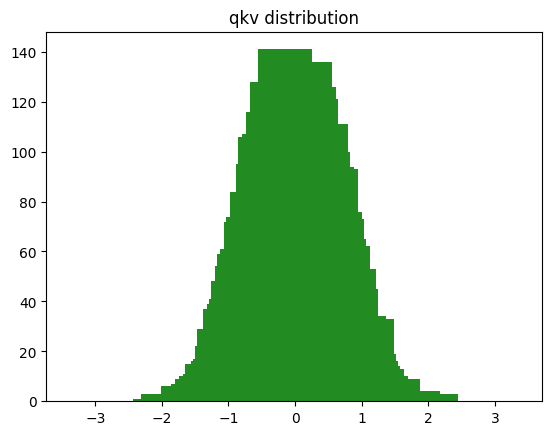

In [10]:

import matplotlib.pyplot as plt
y_val = torch.histc(qkv, bins=200, min=-3, max=3)
x_val = np.arange(-1, 1, 0.01) * 3
plt.bar(x_val, y_val, align='center', color=['forestgreen'])
plt.title('qkv distribution')

In [11]:

num_heads = 8
head_dim = d_model // num_heads
qkv = qkv.reshape(batch_size, sequence_length, num_heads, 3 * head_dim)
     

In [13]:
qkv.shape

torch.Size([1, 4, 8, 192])

In [14]:
qkv

tensor([[[[ 0.4121,  1.0475,  0.9304,  ..., -0.2538,  0.4027, -0.5631],
          [ 0.1265,  0.2357, -0.6932,  ..., -0.0689,  0.3813,  0.8424],
          [-1.7587, -0.1289, -0.3468,  ..., -0.3009, -0.9601,  0.0314],
          ...,
          [ 0.9932,  0.2403,  0.8258,  ..., -0.3528,  0.3935, -0.2210],
          [-0.6290, -0.6340, -0.5650,  ..., -0.5164, -0.0684, -0.6534],
          [ 0.1553,  0.0196, -0.0320,  ...,  1.3388, -0.1815,  0.1959]],

         [[-0.7871, -1.2775, -0.5500,  ...,  0.3808, -0.5871,  0.7528],
          [ 0.1638,  0.2858,  0.4558,  ...,  0.0402,  0.5766,  0.4770],
          [ 0.4846,  0.4001, -0.0595,  ...,  1.1417,  0.7986, -0.1329],
          ...,
          [-0.1952, -0.2761,  0.4180,  ...,  0.7767, -0.3199, -0.6048],
          [ 0.1219, -0.0248,  0.3388,  ...,  0.5961,  0.5987,  0.4035],
          [-0.1016,  0.3181,  1.0048,  ...,  0.1074,  0.6160, -1.4779]],

         [[-0.2909,  0.1563,  0.2988,  ...,  0.5652, -0.4903,  0.4187],
          [-0.0278, -0.9482, -

In [15]:

qkv = qkv.permute(0, 2, 1, 3) # [batch_size, num_heads, sequence_length, 3*head_dim]
qkv.shape

torch.Size([1, 8, 4, 192])

In [16]:
q, k, v = qkv.chunk(3,dim= -1)
q.shape, k.shape, v.shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

In [18]:
import math
d_k = q.size()[-1]
scaled = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(d_k)
scaled.shape

torch.Size([1, 8, 4, 4])

In [19]:
k.T.shape


C:\Users\kotaa\AppData\Local\Temp\ipykernel_5636\3724124494.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3641.)
  k.T.shape


torch.Size([64, 4, 8, 1])

In [20]:

y = torch.randn(2, 3)
torch.transpose(y, 0, 1)

tensor([[-0.0847, -1.0901],
        [ 0.0769,  1.8695],
        [-0.3478, -0.3110]])

In [21]:
torch.transpose(y, 1, 0)


tensor([[-0.0847, -1.0901],
        [ 0.0769,  1.8695],
        [-0.3478, -0.3110]])

In [22]:
k.transpose(-1, -2) == k.transpose(-2, -1)


tensor([[[[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         ...,

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True],
          ...,
          [True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, 

In [23]:
k.transpose(-1, -2).shape


torch.Size([1, 8, 64, 4])

In [24]:

mask = torch.full(scaled.size() , float('-inf'))
mask = torch.triu(mask, diagonal=1)
mask[0][1] # mask for input to a single head

tensor([[0., -inf, -inf, -inf],
        [0., 0., -inf, -inf],
        [0., 0., 0., -inf],
        [0., 0., 0., 0.]])

In [25]:
(scaled + mask)[0][0]


tensor([[ 0.1433,    -inf,    -inf,    -inf],
        [-0.2223, -0.2117,    -inf,    -inf],
        [ 0.1460, -0.1696,  0.4187,    -inf],
        [-0.6582, -0.2578,  0.5641,  0.7072]], grad_fn=<SelectBackward0>)

In [26]:
scaled += mask


In [27]:
np.exp(0.5596) / (np.exp(0.5596) + np.exp(0.0404))


0.6269606805367254

In [28]:
attention = F.softmax(scaled, dim=-1)


In [29]:
attention.shape


torch.Size([1, 8, 4, 4])

In [30]:
attention[0][0]


tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4973, 0.5027, 0.0000, 0.0000],
        [0.3286, 0.2397, 0.4317, 0.0000],
        [0.1020, 0.1522, 0.3463, 0.3995]], grad_fn=<SelectBackward0>)

In [31]:
values = torch.matmul(attention, v)
values.shape

torch.Size([1, 8, 4, 64])

In [32]:


import math

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

In [33]:
values, attention = scaled_dot_product(q, k, v, mask=mask)

In [34]:
attention.shape


torch.Size([1, 8, 4, 4])

In [35]:
attention[0][0]


tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4973, 0.5027, 0.0000, 0.0000],
        [0.3286, 0.2397, 0.4317, 0.0000],
        [0.1020, 0.1522, 0.3463, 0.3995]], grad_fn=<SelectBackward0>)

In [36]:
values.size()


torch.Size([1, 8, 4, 64])

In [37]:

values = values.reshape(batch_size, sequence_length, num_heads * head_dim)
values.size()

torch.Size([1, 4, 512])

In [38]:
linear_layer = nn.Linear(d_model, d_model)


In [39]:
out = linear_layer(values)

In [40]:
out.shape

torch.Size([1, 4, 512])

In [41]:
out


tensor([[[-0.1676,  0.0361, -0.1637,  ..., -0.5512,  0.1939, -0.1296],
         [ 0.4908, -0.3093, -0.2582,  ...,  0.5500, -0.1298,  0.1635],
         [ 0.6074, -0.2322, -0.0047,  ..., -0.0936,  0.2092, -0.0075],
         [-0.0271, -0.1051, -0.0044,  ..., -0.0617, -0.2960, -0.2976]]],
       grad_fn=<ViewBackward0>)

In [42]:

import torch
import torch.nn as nn
import math

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

class MultiheadAttention(nn.Module):

    def __init__(self, input_dim, d_model, num_heads):
        super().__init__()
        self.input_dim = input_dim
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(input_dim , 3 * d_model)
        self.linear_layer = nn.Linear(d_model, d_model)
    
    def forward(self, x, mask=None):
        batch_size, sequence_length, input_dim = x.size()
        print(f"x.size(): {x.size()}")
        qkv = self.qkv_layer(x)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3)
        print(f"qkv.size(): {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1)
        print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
        values, attention = scaled_dot_product(q, k, v, mask)
        print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
        values = values.reshape(batch_size, sequence_length, self.num_heads * self.head_dim)
        print(f"values.size(): {values.size()}")
        out = self.linear_layer(values)
        print(f"out.size(): {out.size()}")
        return out

In [43]:

input_dim = 1024
d_model = 512
num_heads = 8

batch_size = 30
sequence_length = 5
x = torch.randn( (batch_size, sequence_length, input_dim) )

model = MultiheadAttention(input_dim, d_model, num_heads)
out = model.forward(x)

x.size(): torch.Size([30, 5, 1024])
qkv.size(): torch.Size([30, 5, 1536])
qkv.size(): torch.Size([30, 5, 8, 192])
qkv.size(): torch.Size([30, 8, 5, 192])
q size: torch.Size([30, 8, 5, 64]), k size: torch.Size([30, 8, 5, 64]), v size: torch.Size([30, 8, 5, 64]), 
values.size(): torch.Size([30, 8, 5, 64]), attention.size:torch.Size([30, 8, 5, 5]) 
values.size(): torch.Size([30, 5, 512])
out.size(): torch.Size([30, 5, 512])
